In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


# Question 1 Python Basics for Data Preprocessing


In [36]:
#Q 1.1 Concat X and y into one data frame based on their row index
import pandas as pd
all_data=pd.concat([X, y], axis=1)
all_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [37]:
#Remove all records with missing value, and value '?' 
#How many records are there before and after the removal?
temp1=all_data[all_data != '?'].dropna()
all_data=temp1
print(len(all_data),len(temp1))


45222 45222


In [41]:
# Q 1.2 Display all the possible values of income. How many redundant values are there? 
# Combine the values that have the same meaning by replacing all redundant values 
# by a selected value.
# How many uniqure values are there after the replacement?
print(all_data['income'].unique())
all_data['income'] = all_data['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
print(all_data['income'].unique())
#There are 2 redundant values. 2 values left.

['<=50K' '>50K']
['<=50K' '>50K']


# Question 2 Basic stats


In [42]:
#Q2.1 Compute the average hours-per-week for each occupation. 
# Sort the output (occupation and average hours-per-week) in an ascending order.
# What occupations(specified) have the most the least hours-per-week?

average_hours_per_week = all_data.groupby('occupation')['hours-per-week'].mean()
average_hours_per_week.sort_values(ascending=True)
#ranked_values = average_hours_per_week.rank(ascending=False)
#print(average_hours_per_week,ranked_values)

#Farming-fishing has the most. Priv-house-serv has the least.

occupation
Priv-house-serv      32.896552
Other-service        34.669301
Adm-clerical         37.709747
Handlers-cleaners    37.859238
Tech-support         39.761972
Sales                40.726516
Machine-op-inspct    40.745455
Armed-Forces         41.714286
Craft-repair         42.265449
Prof-specialty       42.279294
Protective-serv      42.811475
Transport-moving     44.746114
Exec-managerial      44.972259
Farming-fishing      46.833784
Name: hours-per-week, dtype: float64

In [43]:
# Q2.2 Among all the people who have >50k income, 
# Sort the output (occupation and people count) in an ascending order.
# what 3 occupations(specified) have the most people? 
count = all_data[all_data['income'] == '>50K'].groupby('occupation').size()
count.sort_values(ascending=True)


#Exec-manageriall, Prof-specialty, Sales



occupation
Priv-house-serv         3
Armed-Forces            4
Handlers-cleaners     135
Farming-fishing       172
Other-service         196
Protective-serv       307
Machine-op-inspct     365
Tech-support          411
Transport-moving      478
Adm-clerical          756
Craft-repair         1355
Sales                1455
Prof-specialty       2704
Exec-managerial      2867
dtype: int64

In [44]:
# Q2.3 Which 3 occupation(specified) have the highest proportion of people
# with an income >50K? 
# Sort the output (occupation and proportion) in an ascending order.
# Are they the same as the previous questions? Why?
count1 = all_data[all_data['income'] == '>50K'].groupby('occupation').size()
count2 = all_data.groupby('occupation').size()
prop=count1/count2

prop.sort_values(ascending=True)
#Exec-managerial,Prof-specialty,Armed-Forces 
#not the same

occupation
Priv-house-serv      0.012931
Other-service        0.040765
Handlers-cleaners    0.065982
Farming-fishing      0.116216
Machine-op-inspct    0.122896
Adm-clerical         0.136462
Transport-moving     0.206390
Craft-repair         0.225083
Sales                0.269046
Armed-Forces         0.285714
Tech-support         0.289437
Protective-serv      0.314549
Prof-specialty       0.450067
Exec-managerial      0.479111
dtype: float64

In [45]:
# Q2.4 What occupation has the most people with a Bachelor's degree as the highest degree?
#What occupation has the most male with a Bachelor's degree as the highest degree? How about female?
# Are the results the same for all the people, for male only, and for female only?
# Sort the output (occupation and people count) in an ascending order.
#all_data['education'].unique()

count1 = all_data[all_data['education'] == 'Bachelors'].groupby('occupation').size()
count2 = all_data[(all_data['education'] == 'Bachelors')&(all_data['sex'] == 'Male')].groupby('occupation').size()
count3 = all_data[(all_data['education'] == 'Bachelors')&(all_data['sex'] == 'Female')].groupby('occupation').size()
count1.sort_values(ascending=True)
count2.sort_values(ascending=True)
count3.sort_values(ascending=True)

#print(count1,count2,count3)#.rank(ascending=False)       

#all: Prof-specialty, Male: Exec-managerial, Female: Prof-specialty

occupation
Transport-moving       4
Handlers-cleaners      7
Farming-fishing        8
Priv-house-serv        9
Machine-op-inspct     17
Craft-repair          19
Protective-serv       24
Other-service        114
Tech-support         114
Sales                268
Adm-clerical         409
Exec-managerial      489
Prof-specialty       848
dtype: int64

# Question 3 Distributions and Correlations 

<Axes: xlabel='sex'>

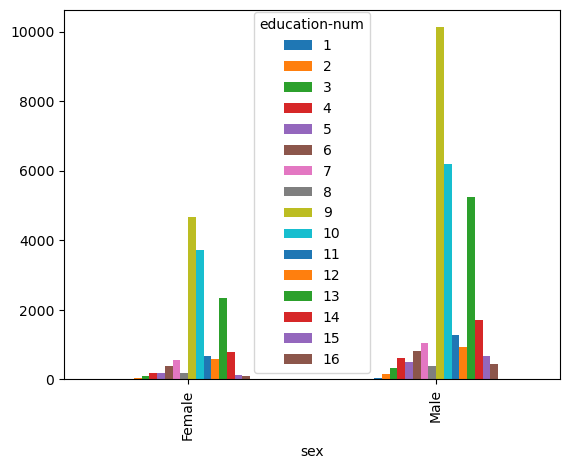

In [62]:
# Q3.1 Plot the barplot of education-num for male, and female. 
# Order the columns of education-num on the x-axis in an ascending order 
# How do their distributions compare to each other? How do their amplitudes compare to each other? 

#all_data.groupby('sex')['education-num'].plot(kind='hist', alpha=0.5,legend=True)
frequency = all_data.groupby('sex')['education-num'].value_counts()
frequency.unstack().plot(kind='bar')

# Yes they do

0.12514645910572103

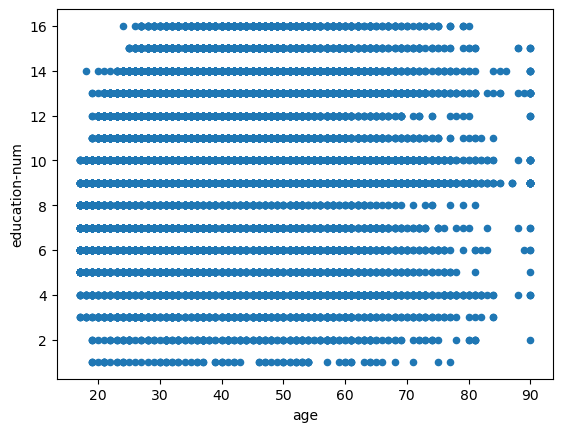

In [78]:
# Q3.2 Plot the scatter plot of education-num against age. Compute their correlation.
# How much are they related? 
all_data.plot(y='education-num', x='age', kind='scatter')

all_data['education-num'].corr(all_data['age'])

#their correlation coefficient is very low. Not correlated.

<Axes: xlabel='age', ylabel='hours-per-week'>

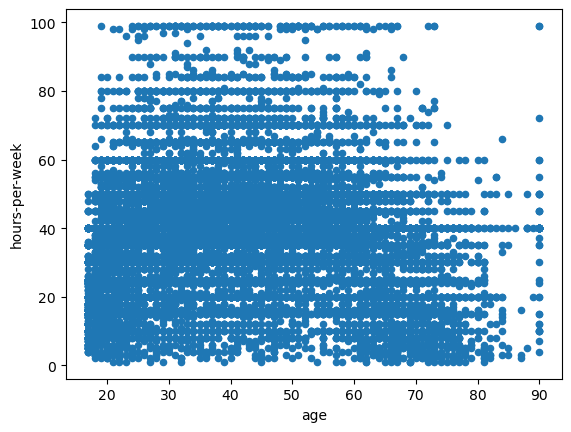

In [83]:
# Q3.3 Plot the scatter plot of hours-per-week against age. 
# Describe some datapoints/patterns that look interesting to you and explain why.
all_data.plot(x='age', y='hours-per-week', kind='scatter')

#There's a 90-year old person working 100 hours per week, is that real?

<Axes: xlabel='occupation'>

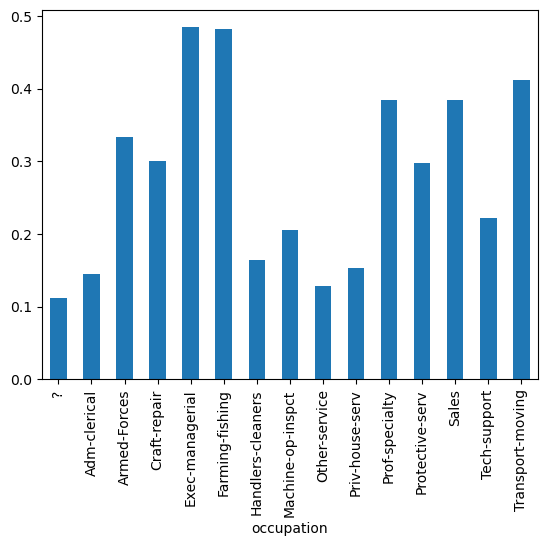

In [101]:
# Q3.4 Plot a bar plot of the proportion of people in each occupation that work 
# more than the average hour-per-week for all people. 
# Fill the missing value with 0.
# Which occupation has the most proportion of people?
mean_hour=all_data['hours-per-week'].mean()
count1 = all_data[all_data['hours-per-week'] >mean_hour].groupby('occupation').size()
count2 = all_data.groupby('occupation').size()
prop=(count1/count2).fillna(0)
prop.plot(kind='bar')
#Exec-manegerial

# Question 4 Associations

In [109]:
#Q4.1 Plot the contigency table to show the bivariate frequency distribution 
# of sex and marital-status
# Given a male, what's the probability that he is never-married?
# Given a female, what's the probability that she is never-married? 
# Which sex has a higher never-married count? Which gender has higher never-married probability?
# Are the answers different, and why?
contingency_table = pd.crosstab(all_data['marital-status'], all_data['sex'])
print(contingency_table,contingency_table['Male']['Never-married']/sum(contingency_table['Male']),
contingency_table['Female']['Never-married']/sum(contingency_table['Female']))
# Male has more never-married count. Female has higher never-married probability.
# They're different. Because there are more male in the data so that the probability is lowered by the large base.

sex                    Female   Male
marital-status                      
Divorced                 4001   2632
Married-AF-spouse          25     12
Married-civ-spouse       2480  19899
Married-spouse-absent     304    324
Never-married            7218   8899
Separated                 931    599
Widowed                  1233    285 0.2725574272588055 0.44577569169960474


In [118]:
# Q4.2  Plot the contigency table to show the bivariate frequency distribution 
# of race and relationship
# Given an unmarried person, what's the probability that this person is a white person?
# Given an unmarried person, what's the probability that he is a black person? 
# Which race has a higher unmarried count? Which race has a higher unmarried probability?
# Are the answers different, and why?

contingency_table = pd.crosstab(all_data['race'], all_data['relationship'])
print(contingency_table,contingency_table['Unmarried']['White']/sum(contingency_table['Unmarried']),
contingency_table['Unmarried']['Black']/sum(contingency_table['Unmarried']))

relationship        Husband  Not-in-family  Other-relative  Own-child  \
race                                                                    
Amer-Indian-Eskimo      135            125              22         67   
Asian-Pac-Islander      589            325             123        249   
Black                  1011           1223             242        839   
Other                   123            105              41         57   
White                 17858          10805            1078       6369   

relationship        Unmarried  Wife  
race                                 
Amer-Indian-Eskimo         93    28  
Asian-Pac-Islander        130   103  
Black                    1144   226  
Other                      57    23  
White                    3701  1951   0.7221463414634146 0.22321951219512196
